#**ENTENDER EL DATASET**

Este conjunto de datos recoge las quejas de los clientes de diversas compañías en Estados Unidos, organizadas por producto, subproducto, tipo de problema y subproblema. Incluye también la fecha en la que se registró cada queja, la respuesta proporcionada por la empresa y si dicha respuesta fue puntual.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random
import os
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

In [3]:
print(os.getcwd())
#df = pd.read_csv('C:/Users/silvi/Documents/DATA_SCIENCE/TheBridge - copia/DSPT2025-ML/Proyecto final/data/quejas-clientes.csv')
#df.head()
os.chdir(r"/content/sample_data/")
df = pd.read_csv("quejas-clientes.csv")
df.tail()

/content


,Unnamed: 0,Complaint ID,Product,Sub-product,Issue,Sub-issue,State,ZIP code,Date received,Date sent to company,Company,Company response,Timely response?,Consumer disputed?
28151,28151,1178184,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,75201.0,2015-01-01,2015-01-02,"Enhanced Recovery Company, LLC",Closed with non-monetary relief,Yes,No
28152,28152,1178183,Consumer loan,Vehicle loan,Taking out the loan or lease,NaN,GA,30043.0,2015-01-01,2015-01-07,DriveTime,Closed with explanation,Yes,NaN
28153,28153,1178182,Mortgage,Conventional fixed mortgage,"Loan servicing, payments, escrow account",NaN,MN,55105.0,2015-01-01,2015-01-02,Regions,Closed with non-monetary relief,Yes,No
28154,28154,1178181,Payday loan,NaN,Can't stop charges to bank account,NaN,CA,92509.0,2015-01-01,2015-01-07,Moneytree Inc,Closed with explanation,Yes,NaN
28155,28155,1178180,Money transfers,Domestic (US) money transfer,Other transaction issues,NaN,OH,45068.0,2015-01-01,2015-01-02,PayPal,Closed with explanation,Yes,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28156 entries, 0 to 28155
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            28156 non-null  int64  
 1   Complaint ID          28156 non-null  int64  
 2   Product               28156 non-null  object 
 3   Sub-product           17582 non-null  object 
 4   Issue                 28154 non-null  object 
 5   Sub-issue             13211 non-null  object 
 6   State                 27735 non-null  object 
 7   ZIP code              27876 non-null  float64
 8   Date received         28156 non-null  object 
 9   Date sent to company  28156 non-null  object 
 10  Company               28156 non-null  object 
 11  Company response      28156 non-null  object 
 12  Timely response?      28156 non-null  object 
 13  Consumer disputed?    6006 non-null   object 
dtypes: float64(1), int64(2), object(11)
memory usage: 3.0+ MB


In [5]:
#Elimino la columna Unnamed ya que coincide con la del índice.
#Elimino la variable de Complaint ID porque no me aporta mucha información
#Elimino la variable Consumer disputed ya que tiene demasiados valores faltantes
df.drop('Unnamed: 0', axis=1, inplace=True)
df.drop('Complaint ID', axis=1, inplace=True)
df.drop('Consumer disputed?', axis=1, inplace=True)
df.head()

,Product,Sub-product,Issue,Sub-issue,State,ZIP code,Date received,Date sent to company,Company,Company response,Timely response?
0,Debt collection,NaN,Communication tactics,Frequent or repeated calls,TX,76119.0,2015-03-19,2015-03-19,"Premium Asset Services, LLC",In progress,Yes
1,Debt collection,Medical,Cont'd attempts collect debt not owed,Debt is not mine,TX,77479.0,2015-03-19,2015-03-19,Accounts Receivable Consultants Inc.,Closed with explanation,Yes
2,Mortgage,FHA mortgage,"Application, originator, mortgage broker",NaN,MA,2127.0,2015-03-19,2015-03-19,RBS Citizens,Closed with explanation,Yes
3,Credit card,NaN,Other,NaN,CA,92592.0,2015-03-19,2015-03-19,Navy FCU,In progress,Yes
4,Debt collection,Non-federal student loan,Cont'd attempts collect debt not owed,Debt resulted from identity theft,NaN,43068.0,2015-03-19,2015-03-19,Transworld Systems Inc.,In progress,Yes


#**PREPROCESAMIENTO DE LOS DATOS**

In [7]:
#Convierto las columnas a datetime para poder trabajar con ellas

df["Date received"] = pd.to_datetime(df["Date received"])
df["Date sent to company"] = pd.to_datetime(df["Date sent to company"])

#FEATURE ENGINEERING

#Creo una nueva columna con la resta de las columnas, Date received (Fecha de recepción de la queja, cuando se recopilan las quejas) y Date sent to company (fecha en la que fue remitida a la
#empresa para que se pueda responder o gestinar el caso). Calculo el tiempo en días de ese retraso desde que se recibe la queja en algún sistema que recoge las quejas hasta que ésta es remitida
#a la empresa
df["Retraso envio dias"] = (df["Date sent to company"] - df["Date received"]).dt.days

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28156 entries, 0 to 28155
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Product               28156 non-null  object        
 1   Sub-product           17582 non-null  object        
 2   Issue                 28154 non-null  object        
 3   Sub-issue             13211 non-null  object        
 4   State                 27735 non-null  object        
 5   ZIP code              27876 non-null  float64       
 6   Date received         28156 non-null  datetime64[ns]
 7   Date sent to company  28156 non-null  datetime64[ns]
 8   Company               28156 non-null  object        
 9   Company response      28156 non-null  object        
 10  Timely response?      28156 non-null  object        
 11  Retraso envio dias    28156 non-null  int64         
dtypes: datetime64[ns](2), float64(1), int64(1), object(8)
memory usage: 2.6+ M

In [9]:
#################################VALORES FALTANTES#################################################

#Relleno los valores faltantes de  Sub-product con NI (no informado)
#Relleno los valores faltantes de  Sub-issue con NI (no informado)
df["Sub-product"] = df["Sub-product"].fillna("NI")
df["Sub-issue"] = df["Sub-issue"].fillna("NI")

In [11]:
#He descargado un csv con zips de USA para rellenar los NANs de la columna ZIP
#df_zips = pd.read_csv(r'C:\Users\silvi\Documents\DATA_SCIENCE\TheBridge - copia\DSPT2025-ML\Proyecto final\Silvia_Proyecto_Final_ML\notebooks\uszips.csv')
df_zips = pd.read_csv("uszips.csv")


In [ ]:
df_zips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33782 entries, 0 to 33781
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   zip               33782 non-null  int64  
 1   lat               33782 non-null  float64
 2   lng               33782 non-null  float64
 3   city              33782 non-null  object 
 4   state_id          33782 non-null  object 
 5   state_name        33782 non-null  object 
 6   zcta              33782 non-null  bool   
 7   parent_zcta       0 non-null      float64
 8   population        33763 non-null  float64
 9   density           33763 non-null  float64
 10  county_fips       33782 non-null  int64  
 11  county_name       33782 non-null  object 
 12  county_weights    33782 non-null  object 
 13  county_names_all  33782 non-null  object 
 14  county_fips_all   33782 non-null  object 
 15  imprecise         33782 non-null  bool   
 16  military          33782 non-null  bool  

In [12]:
#Función para rellenar los valores faltantes de la columna ZIP code en el df
def rellenar_zips(zip_code):
    if pd.isna(zip_code):
        return random.choice(df_zips["zip"])
    else:
        return zip_code

df["ZIP code"] = df["ZIP code"].apply(rellenar_zips)

In [13]:
#Paso la columna ZIP code de float64 a entero
df["ZIP code"] = df["ZIP code"].astype(int)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28156 entries, 0 to 28155
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Product               28156 non-null  object        
 1   Sub-product           28156 non-null  object        
 2   Issue                 28154 non-null  object        
 3   Sub-issue             28156 non-null  object        
 4   State                 27735 non-null  object        
 5   ZIP code              28156 non-null  int64         
 6   Date received         28156 non-null  datetime64[ns]
 7   Date sent to company  28156 non-null  datetime64[ns]
 8   Company               28156 non-null  object        
 9   Company response      28156 non-null  object        
 10  Timely response?      28156 non-null  object        
 11  Retraso envio dias    28156 non-null  int64         
dtypes: datetime64[ns](2), int64(2), object(8)
memory usage: 2.6+ MB


In [15]:
df["State"].unique()

array(['TX', 'MA', 'CA', nan, 'OH', 'NJ', 'ND', 'RI', 'CO', 'UT', 'AL',
       'PA', 'NY', 'NC', 'GA', 'IL', 'WI', 'MI', 'FL', 'CT', 'OR', 'VA',
       'WA', 'TN', 'MD', 'IA', 'KY', 'LA', 'OK', 'NE', 'KS', 'MO', 'NH',
       'IN', 'DC', 'NV', 'ME', 'NM', 'SC', 'AZ', 'AP', 'MS', 'MN', 'ID',
       'HI', 'PR', 'WV', 'WY', 'AK', 'VI', 'MT', 'DE', 'AR', 'AE', 'SD',
       'GU', 'VT', 'MH', 'PW', 'AS'], dtype=object)

In [16]:
#Quiero rellenar los NAN de la columna State con los valores obtenidos del df_zips
# Crear un diccionario ZIP → State
zip_to_state = df_zips.set_index('zip')['state_id'].to_dict()

# Rellenar los NaN en df['State'] usando ZIP code
df["State"] = df["State"].fillna(df['ZIP code'].map(zip_to_state))

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28156 entries, 0 to 28155
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Product               28156 non-null  object        
 1   Sub-product           28156 non-null  object        
 2   Issue                 28154 non-null  object        
 3   Sub-issue             28156 non-null  object        
 4   State                 28126 non-null  object        
 5   ZIP code              28156 non-null  int64         
 6   Date received         28156 non-null  datetime64[ns]
 7   Date sent to company  28156 non-null  datetime64[ns]
 8   Company               28156 non-null  object        
 9   Company response      28156 non-null  object        
 10  Timely response?      28156 non-null  object        
 11  Retraso envio dias    28156 non-null  int64         
dtypes: datetime64[ns](2), int64(2), object(8)
memory usage: 2.6+ MB


In [18]:
#Hay 30 NANs de la columna State que no se han rellenado usando ZIP code, como son sólo 30 los elimino
df.dropna(subset=['State'], inplace=True)

In [19]:
#También elimino los 2 valores faltantes de la columna Issue
df.dropna(subset=['Issue'], inplace=True)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28124 entries, 0 to 28155
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Product               28124 non-null  object        
 1   Sub-product           28124 non-null  object        
 2   Issue                 28124 non-null  object        
 3   Sub-issue             28124 non-null  object        
 4   State                 28124 non-null  object        
 5   ZIP code              28124 non-null  int64         
 6   Date received         28124 non-null  datetime64[ns]
 7   Date sent to company  28124 non-null  datetime64[ns]
 8   Company               28124 non-null  object        
 9   Company response      28124 non-null  object        
 10  Timely response?      28124 non-null  object        
 11  Retraso envio dias    28124 non-null  int64         
dtypes: datetime64[ns](2), int64(2), object(8)
memory usage: 2.8+ MB


Ya no hay valores faltantes

In [21]:
#Exporto a csv este df sin haber aún dividido en variables numéricas y categóricas.
df.to_csv('df.csv', index=False)


In [22]:
#SEPARACIÓN DE VARIABLES NUMÉRICAS Y CATEGÓRICAS
## Identificamos las variables numéricas.

df_num = df.select_dtypes(include=['int64'])

## Identificamos las variables categóricas

df_cat = df.select_dtypes(include=['object'])

In [23]:
#CORRELACIÓN DE LAS VARIABLES NUMÉRICAS

corr_matriz = df_num.corr()
print(corr_matriz)

                    ZIP code  Retraso envio dias
ZIP code            1.000000            0.016325
Retraso envio dias  0.016325            1.000000


In [ ]:
#Sólo hay 2 variables numéricas y no hay correlación entre ellas

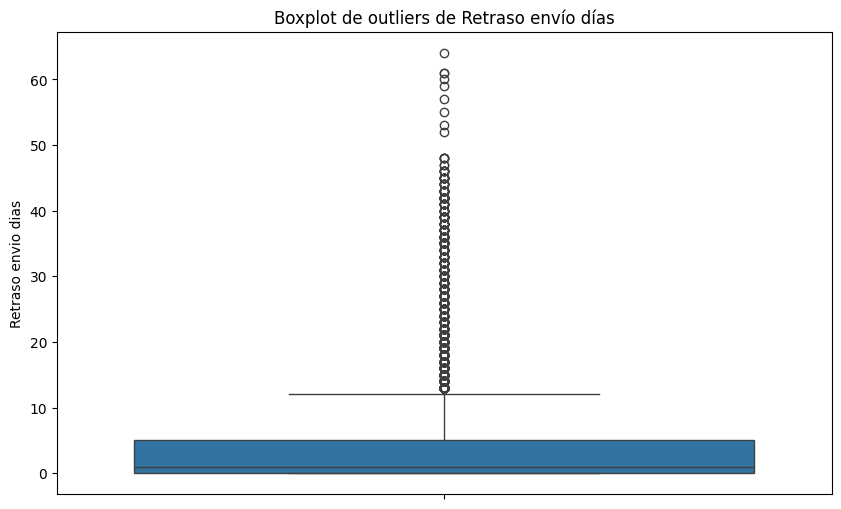

In [25]:
#OUTLIERS

#Reviso la existencia de outliers en el DataFrame, saco un boxplot únicamente de la variable Retraso envío días, ya que no tiene sentido
#hacerlo de la variable ZIP

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_num['Retraso envio dias'])
plt.title('Boxplot de outliers de Retraso envío días')
plt.show()





In [26]:
#########################TRANSFORAMCIÓN DE LOS DATOS############################################
#Es necesario convertir todas las columnas categóricas en valores numéricos para poder utilizarlas en el entrenamiento del modelo.

#Transformo las categorías en números con LabelEncoder

le = LabelEncoder()
df_cat = df_cat.apply(le.fit_transform)

In [27]:
df_cat

,Product,Sub-product,Issue,Sub-issue,State,Company,Company response,Timely response?
0,4,25,23,15,50,1069,4,1
1,4,21,24,11,50,50,1,1
2,6,11,7,22,23,1118,1,1
3,2,25,63,22,7,967,4,1
4,4,26,24,12,40,1401,4,1
...,...,...,...,...,...,...,...,...
28151,4,25,24,11,50,489,3,1
28152,1,42,80,22,13,459,1,1
28153,6,6,55,22,28,1157,3,1
28154,8,25,17,22,7,904,1,1


In [28]:
#Uno de nuevo el df_cat ya convertido a números y df_num

data_completo= pd.concat([df_cat, df_num], axis=1)

In [29]:
data_completo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28124 entries, 0 to 28155
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Product             28124 non-null  int64
 1   Sub-product         28124 non-null  int64
 2   Issue               28124 non-null  int64
 3   Sub-issue           28124 non-null  int64
 4   State               28124 non-null  int64
 5   Company             28124 non-null  int64
 6   Company response    28124 non-null  int64
 7   Timely response?    28124 non-null  int64
 8   ZIP code            28124 non-null  int64
 9   Retraso envio dias  28124 non-null  int64
dtypes: int64(10)
memory usage: 2.4 MB


In [30]:
#Mi variable objetivo es Timely reponse? y quiero ver si hay imbalanceo y podría haber problemas para predecir la clase minoritaria

distribucion_clases = data_completo['Timely response?'].value_counts()
print(distribucion_clases)

Timely response?
1    27412
0      712
Name: count, dtype: int64


Hay imbalanceo de clases, así que tendré que utilizar la técnica de SMOTE cuando vaya a hacer el entrenamiento, generando muestras sintéticas de la clase minoritaria para que tenga más representatividad en el conjunto de datos.

In [31]:
#Normalizo el Dataframe ya que hay valores muy dispares

#Quito la variable objetivo para normalizar pero primero la guardo
columna_objetivo = data_completo['Timely response?']
data_completo_2 = data_completo.drop('Timely response?', axis=1)

scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(data_completo_2)
df_scaled = pd.DataFrame(df_scaled, columns=data_completo_2.columns)
#Vuelvo a añadir la columna de la variable objetivo,si no le pongo .values no me une bien esta columna de vuelta y me salen NaN
df_scaled['Timely response?'] = columna_objetivo.values


In [32]:
df_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28124 entries, 0 to 28123
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Product             28124 non-null  float64
 1   Sub-product         28124 non-null  float64
 2   Issue               28124 non-null  float64
 3   Sub-issue           28124 non-null  float64
 4   State               28124 non-null  float64
 5   Company             28124 non-null  float64
 6   Company response    28124 non-null  float64
 7   ZIP code            28124 non-null  float64
 8   Retraso envio dias  28124 non-null  float64
 9   Timely response?    28124 non-null  int64  
dtypes: float64(9), int64(1)
memory usage: 2.1 MB


In [33]:
df_scaled

,Product,Sub-product,Issue,Sub-issue,State,Company,Company response,ZIP code,Retraso envio dias,Timely response?
0,0.4,0.595238,0.261364,0.326087,0.862069,0.697326,0.8,0.761176,0.000000,1
1,0.4,0.500000,0.272727,0.239130,0.862069,0.032616,0.2,0.774777,0.000000,1
2,0.6,0.261905,0.079545,0.478261,0.396552,0.729289,0.2,0.021182,0.000000,1
3,0.2,0.595238,0.715909,0.478261,0.120690,0.630789,0.8,0.925923,0.000000,1
4,0.4,0.619048,0.272727,0.260870,0.689655,0.913894,0.8,0.430633,0.000000,1
...,...,...,...,...,...,...,...,...,...,...
28119,0.4,0.595238,0.272727,0.239130,0.862069,0.318982,0.6,0.751995,0.015625,1
28120,0.1,1.000000,0.909091,0.478261,0.224138,0.299413,0.2,0.300370,0.093750,1
28121,0.6,0.142857,0.625000,0.478261,0.482759,0.754729,0.6,0.551015,0.015625,1
28122,0.8,0.595238,0.193182,0.478261,0.120690,0.589693,0.2,0.925093,0.093750,1


In [34]:
#Paso el DataFrame a csv
df_scaled .to_csv('df_scaled.csv', index=False)